# <center>Práctica 2</center>
## <center>Filtrado de imágenes en el dominio espacial </center>

In [1]:
#importamos librerías necesarias
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imfunctions as imf
%matplotlib notebook

**I. Noise contaminated images**

For this exercise we are going to generate images contaminated with different kinds of noise using the function imnoise that can be found in the **file** imfuntions.

First generate an image matrix with 8 bits, a uniform intensity of 128 and size of 256x256 pixels (when representing this an image for this exercise remember to use the min and max value arguments in the function imshow).

Now contaminate it using a white noise with a mean = 0 and variance = 0'01. Represent the resulting image and its histogram.

[[128 128 128 ... 128 128 128]
 [128 128 128 ... 128 128 128]
 [128 128 128 ... 128 128 128]
 ...
 [128 128 128 ... 128 128 128]
 [128 128 128 ... 128 128 128]
 [128 128 128 ... 128 128 128]]


<IPython.core.display.Javascript object>


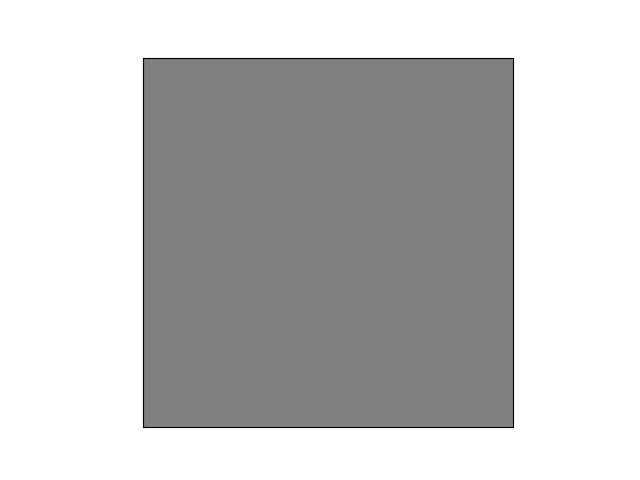

<IPython.core.display.Javascript object>


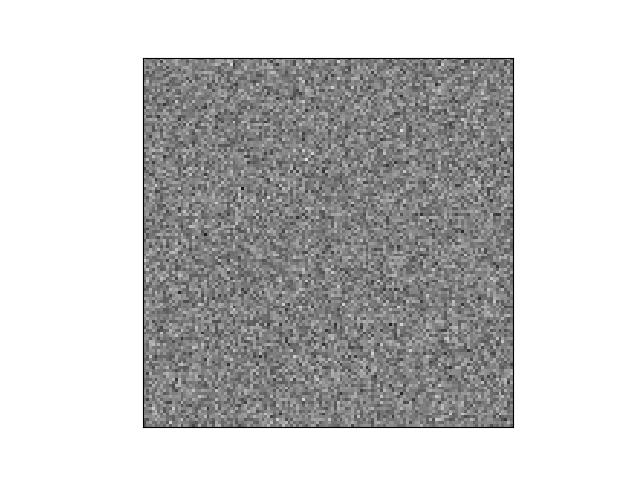

<IPython.core.display.Javascript object>


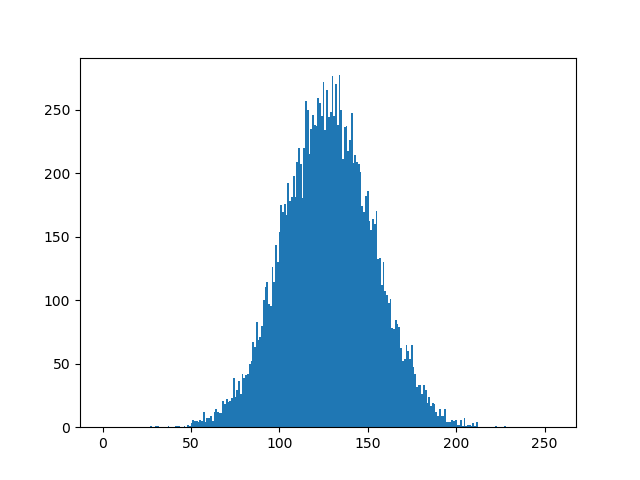

True

In [2]:
%matplotlib notebook
blank = np.ones((128, 128), dtype=np.uint8)*128
print(blank)
plt.figure('blank')
plt.imshow(blank, cmap = 'gray', vmin = 0, vmax = 255)
plt.xticks([]), plt.yticks([])
plt.show()

#generar ruido blanco

blanknoise = imf.imnoise(blank,"gauss", [0,0.01])
plt.figure('white noise')
plt.imshow(blanknoise, cmap = 'gray', vmin = 0, vmax = 255)
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure()
plt.hist(blanknoise.ravel(),256,[0,255])
plt.show()

cv2.imwrite('whitenoise.png',blanknoise)

Contaminate the image coins.png with the same gaussian noise, represent the resulting image and its histogram.

[[49 50 48 ... 58 55 55]
 [47 47 49 ... 56 57 55]
 [48 48 49 ... 57 56 57]
 ...
 [71 70 70 ... 70 69 70]
 [69 71 71 ... 70 72 71]
 [69 68 69 ... 71 72 71]]


<IPython.core.display.Javascript object>


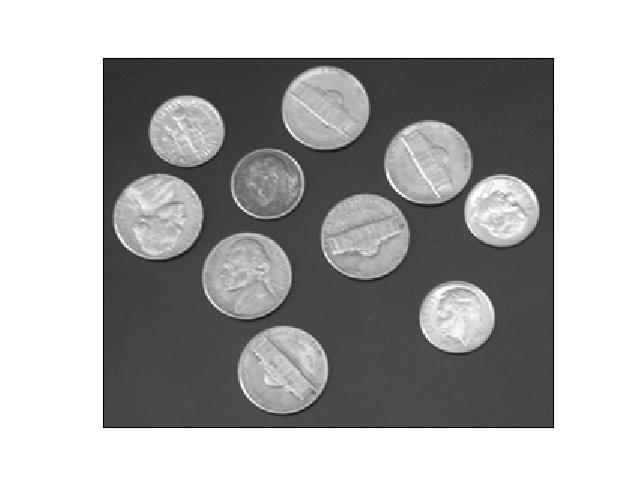

<IPython.core.display.Javascript object>


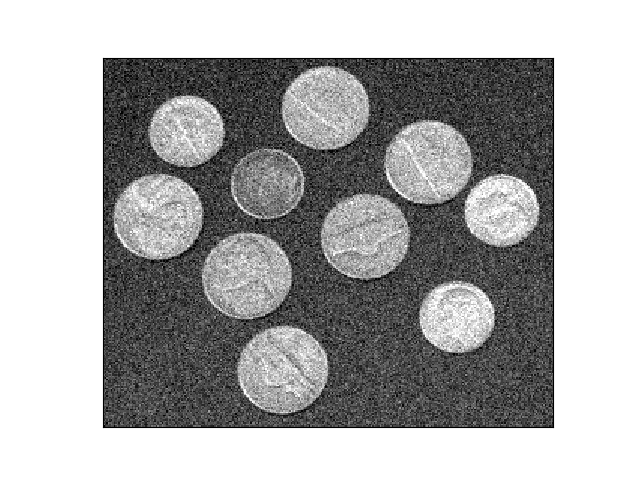

<IPython.core.display.Javascript object>


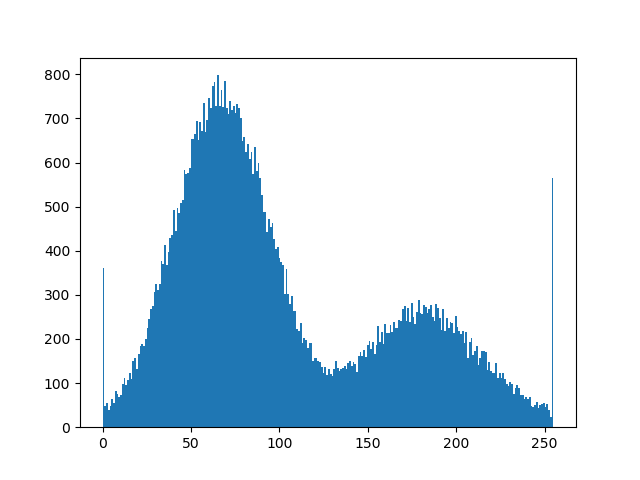

True

In [3]:
coins = cv2.imread('coins.png', 0)
print(coins)
plt.figure('coins')
plt.imshow(coins, cmap = 'gray', vmin = 0, vmax = 255)
plt.xticks([]), plt.yticks([])
plt.show()

coinsgaussian = imf.imnoise(coins,"gauss", [0,0.01])
plt.figure('coins gaussian noise')
plt.imshow(coinsgaussian, cmap = 'gray', vmin = 0, vmax = 255)
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure()
plt.hist(coinsgaussian.ravel(),256,[0,255])
plt.show()

cv2.imwrite('whitenoisecoins.png',coinsgaussian)

**Salt and pepper noise**

Repeat the last process with speckle noise and salt and pepper noise with density = 0'02.

<IPython.core.display.Javascript object>


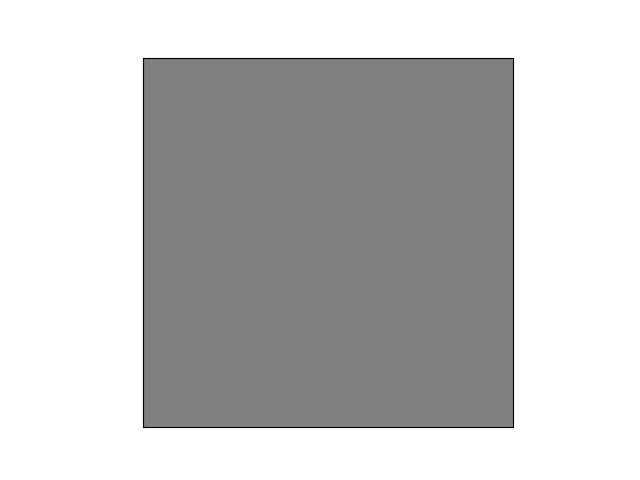

<IPython.core.display.Javascript object>


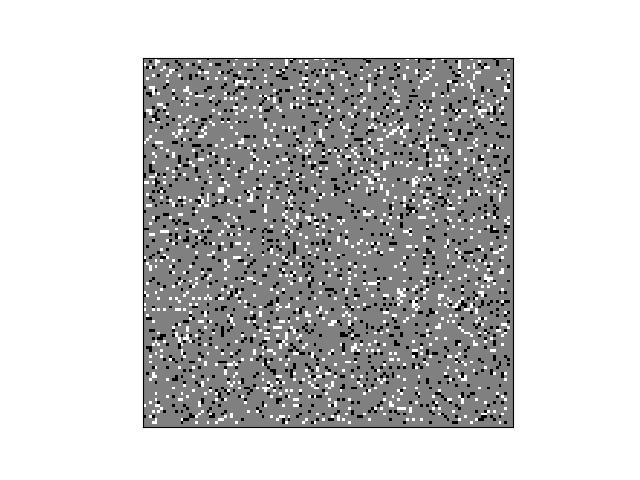

<IPython.core.display.Javascript object>


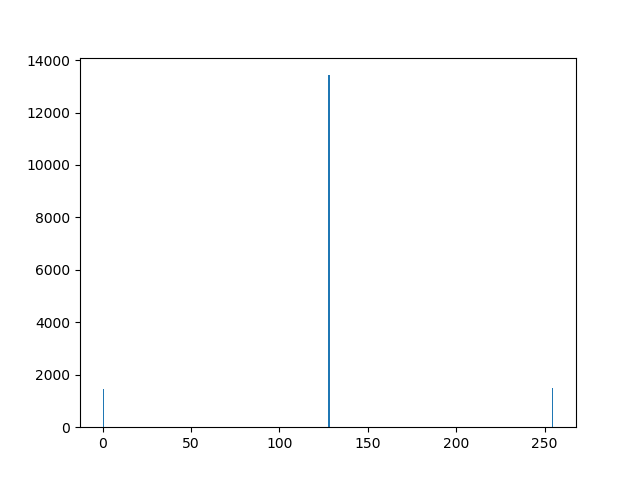

In [4]:
plt.figure('blank2')
plt.imshow(blank, cmap = 'gray', vmin = 0, vmax = 255)
plt.xticks([]), plt.yticks([])
plt.show()

blanksp = imf.imnoise(blank,"sandp", 0.2)
plt.figure('salt and pepper')
plt.imshow(blanksp, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure()
plt.hist(blanksp.ravel(),256,[0,255])
plt.show()

<IPython.core.display.Javascript object>


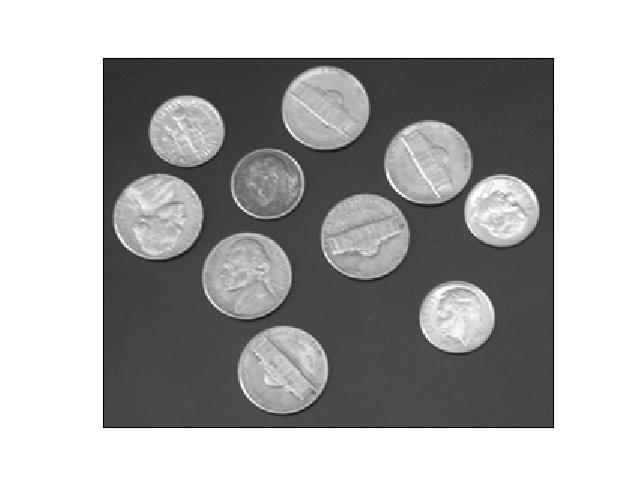

<IPython.core.display.Javascript object>


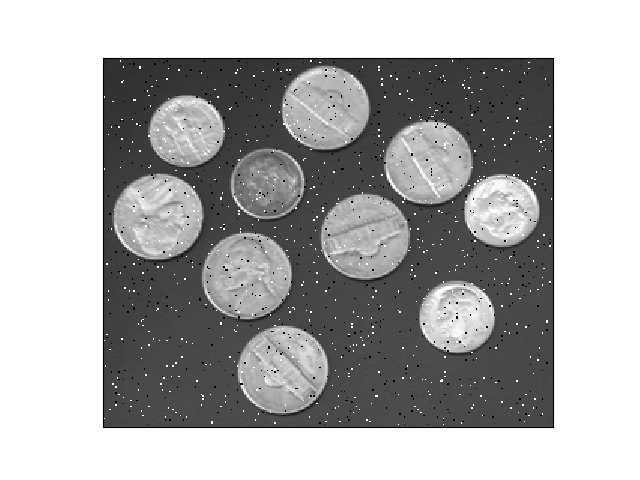

<IPython.core.display.Javascript object>


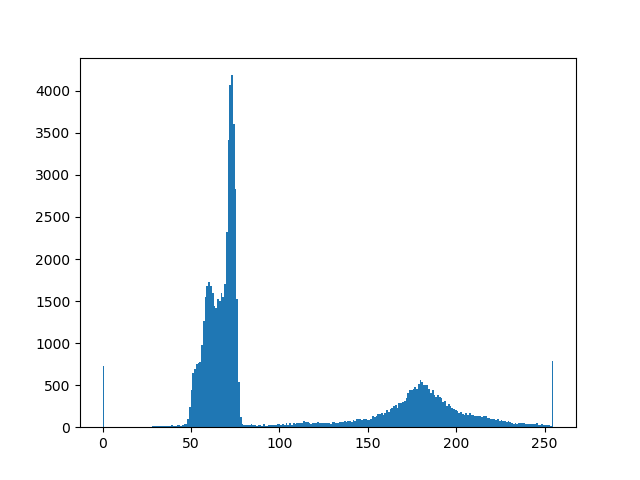

In [5]:
plt.figure('coins2')
plt.imshow(coins, cmap = 'gray', vmin = 0, vmax = 255)
plt.xticks([]), plt.yticks([])
plt.show()

coinssp = imf.imnoise(coins,"sandp", 0.02)
plt.figure('salt and pepper coins')
plt.imshow(coinssp, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure()
plt.hist(coinssp.ravel(),256,[0,255])
plt.show()

**Speckle noise**

Agin with Speckle noise with variance = 0'01

<IPython.core.display.Javascript object>


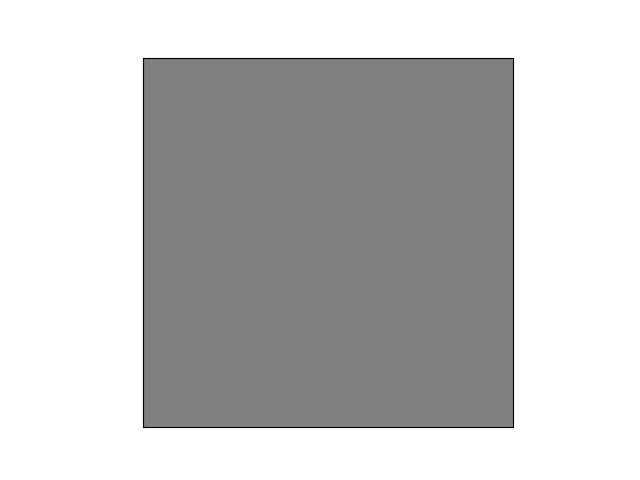

<IPython.core.display.Javascript object>


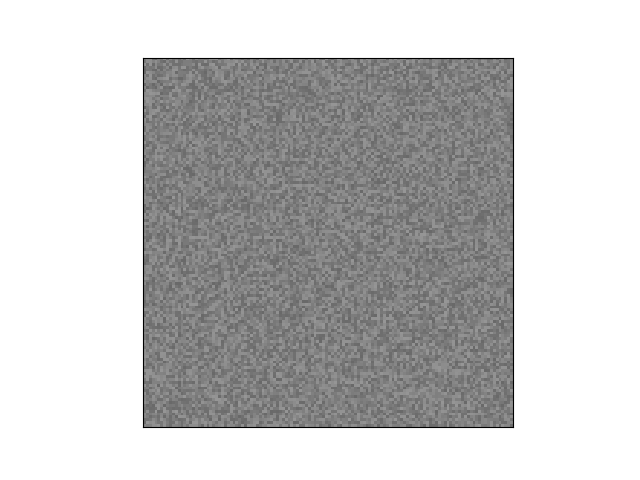

<IPython.core.display.Javascript object>


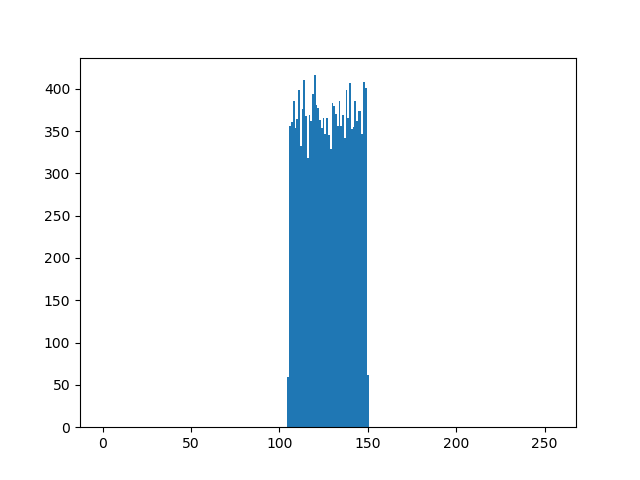

In [6]:
plt.figure('blank3')
plt.imshow(blank, cmap = 'gray', vmin = 0, vmax = 255)
plt.xticks([]), plt.yticks([])
plt.show()

blankspeck = imf.imnoise(blank,"speckle", 0.01)
plt.figure('speckle')
plt.imshow(blankspeck, cmap = 'gray', vmin = 0, vmax = 255)
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure()
plt.hist(blankspeck.ravel(),256,[0,255])
plt.show()

**Softening linear filters**

To eliminate these kind of noises we use softening filters (low pass filter). [Here](https://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html) is a link to how they work.

- Averaging filter: The first step to using a linear filter is creating a Kernel. A kernel is a matrix with different characteristics depending on the filter. Averaging filters kernels must add up to one. To create one make a numpy 5x5 matrix of ones and divide it by de total size of the matrix (5x5=25) so al its digits add up to one.

Now filter the image coins contaminated with Gaussian noise using the openCV function [filter2D](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=filter2d#filter2d) in border type use cv2.BORDER_CONSTANT (for zero padding) what this is will be explained in the next point. Represent side by side the contaminated image and the filtered image.

<IPython.core.display.Javascript object>


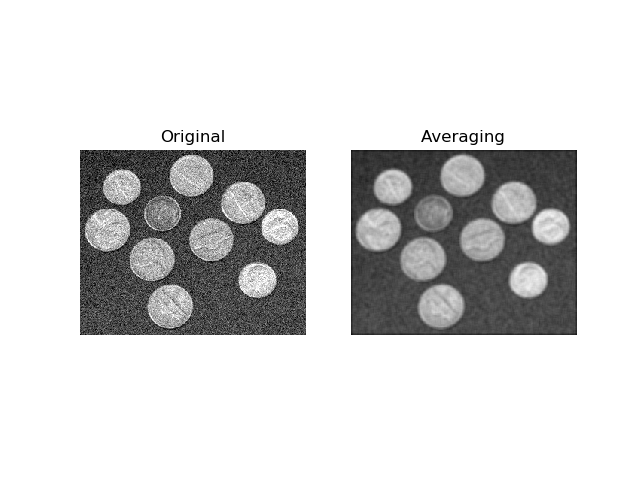

In [7]:
kernel = np.ones((5,5),np.float32)/(5*5)
coinsfilter = cv2.filter2D(coinsgaussian, -1, kernel, borderType= cv2.BORDER_CONSTANT)

plt.figure()
plt.subplot(121),plt.imshow(coinsgaussian, cmap = 'gray', vmin = 0, vmax = 255),plt.title('Original')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.subplot(122),plt.imshow(coinsfilter, cmap = 'gray', vmin = 0, vmax = 255),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

**Padding**

Padding refers to the pixels "created" next to the border of an image so the kernel can be applied for every pixel of the original image. For more information about padding. For example in the last exercise we used zero padding, that means the created pixels around the image are all zero wich when used creates a darker border at the edge of the image as a result of averaing with 0.

Other example of padding is Mirror padding wich creates this new pixels by copying those of the image starting from the closest pixel.
To learn more about padding options in the function filter2D click [here](https://docs.opencv.org/3.1.0/d2/de8/group__core__array.html#ga209f2f4869e304c82d07739337eae7c5)

Filter the image coins contaminated with gaussian noise using the same kernel as last time but with mirror padding (cv2.BORDER_REFLECT). Represent the original, zero and mirror padding images side by side and try to spot the differences.

<IPython.core.display.Javascript object>


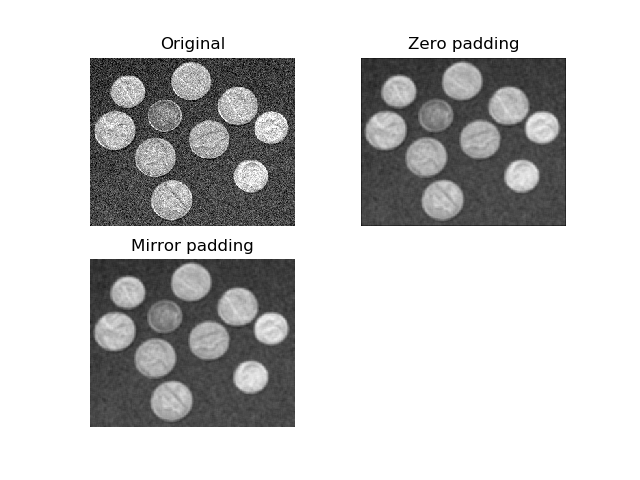

In [8]:
coinsfiltermir = cv2.filter2D(coinsgaussian, -1, kernel, borderType= cv2.BORDER_REFLECT)

plt.figure()
plt.subplot(221),plt.imshow(coinsgaussian, cmap = 'gray', vmin = 0, vmax = 255),plt.title('Original')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.subplot(222),plt.imshow(coinsfilter, cmap = 'gray', vmin = 0, vmax = 255),plt.title('Zero padding')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.subplot(223),plt.imshow(coinsfiltermir, cmap = 'gray', vmin = 0, vmax = 255),plt.title('Mirror padding')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()


To appreciate the difference in values between the two images represent both histograms and look and the lowest intensity vales in each of them.

<IPython.core.display.Javascript object>


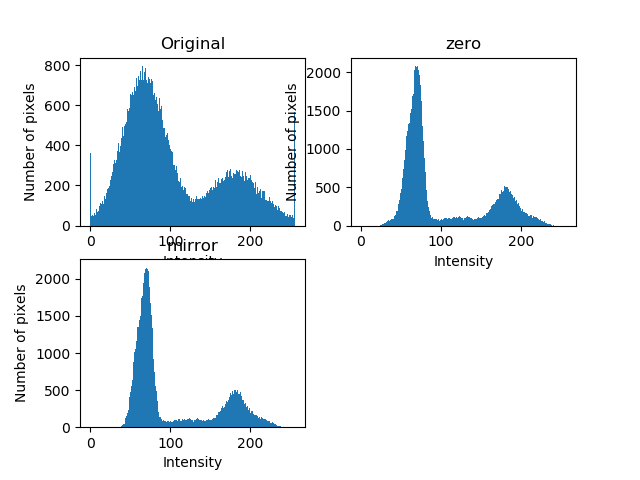

In [9]:
plt.figure('histograms')
plt.subplot(221),plt.hist(coinsgaussian.ravel(),256,[0,256]),plt.title('Original') 
plt.xlabel('Intensity')
plt.ylabel('Number of pixels')
plt.subplot(222),plt.hist(coinsfilter.ravel(),256,[0,256]),plt.title('zero') 
plt.xlabel('Intensity')
plt.ylabel('Number of pixels')
plt.subplot(223),plt.hist(coinsfiltermir.ravel(),256,[0,256]),plt.title('mirror') 
plt.xlabel('Intensity')
plt.ylabel('Number of pixels')
plt.show()

Now change the side of the kernel to 35x35, remmber that all values must add up to 1 and filter coins+gaussian with this kernel and mirror padding.
Represent the contaminated image, the filtered image with 5x5 kernel and this new image side by side.

<IPython.core.display.Javascript object>


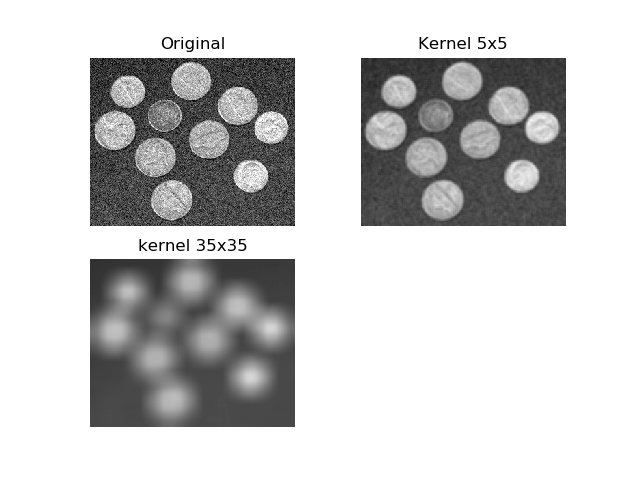

<IPython.core.display.Javascript object>


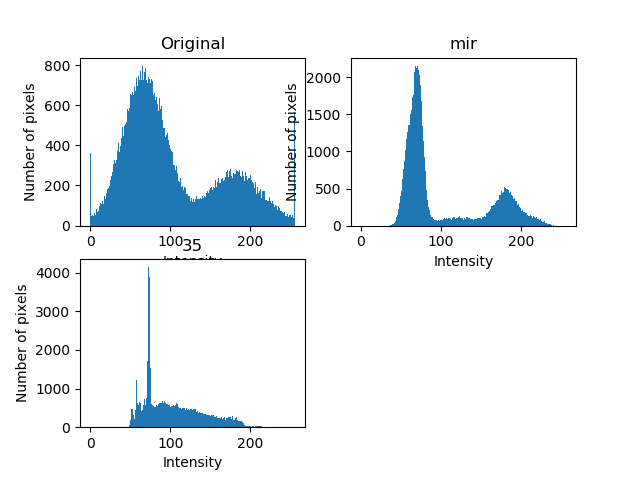

In [10]:
kernel35 = np.ones((35,35),np.float32)/(35*35)

coinsfilter35 = cv2.filter2D(coinsgaussian, -1, kernel35, borderType= cv2.BORDER_REFLECT)

plt.figure()
plt.subplot(221),plt.imshow(coinsgaussian, cmap = 'gray', vmin = 0, vmax = 255),plt.title('Original')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.subplot(222),plt.imshow(coinsfiltermir, cmap = 'gray', vmin = 0, vmax = 255),plt.title('Kernel 5x5')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.subplot(223),plt.imshow(coinsfilter35, cmap = 'gray', vmin = 0, vmax = 255),plt.title('kernel 35x35')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

plt.figure('histograms2')
plt.subplot(221),plt.hist(coinsgaussian.ravel(),256,[0,256]),plt.title('Original') 
plt.xlabel('Intensity')
plt.ylabel('Number of pixels')
plt.subplot(222),plt.hist(coinsfiltermir.ravel(),256,[0,256]),plt.title('mir') 
plt.xlabel('Intensity')
plt.ylabel('Number of pixels')
plt.subplot(223),plt.hist(coinsfilter35.ravel(),256,[0,256]),plt.title('35') 
plt.xlabel('Intensity')
plt.ylabel('Number of pixels')
plt.show()

**Salt and pepper**

Filter the image coins contaminated with salt and pepper noise with the 5x5 kernel and mirror padding.

**Non-linear softening filters**

While the linear filter were based on the convolution of an image with an external kernel the non-linear filters use the operate directly with the image pixels
- Median filter: This filter takes all the values under the kernel and asigns the median of those values to the one in the center of the kernel. This makes this filter ideal to deal with salt and pepper noise.

Opencv has a specific finction for this filter [medianblur](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=medianblur#medianblur). Filter the image coins contaminated with salt and pepper noise using a median filter with a kernel size = 5. Represent the original image and this last image.

Do the same for the image contaminated with gaussian noise. Which filter is better for each type of noise?
https://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html
https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=medianblur#medianblur

<IPython.core.display.Javascript object>


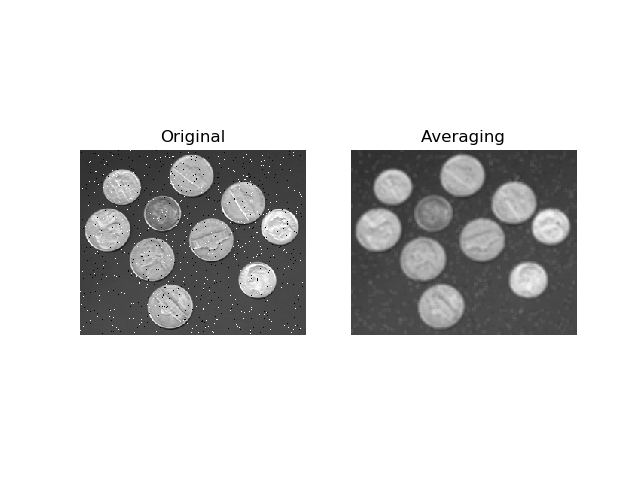

In [14]:
filtersyp = cv2.filter2D(coinssp, -1, kernel, borderType= cv2.BORDER_REFLECT)

plt.figure()
plt.subplot(121),plt.imshow(coinssp, cmap = 'gray', vmin = 0, vmax = 255),plt.title('Original')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.subplot(122),plt.imshow(filtersyp, cmap = 'gray', vmin = 0, vmax = 255),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

<IPython.core.display.Javascript object>


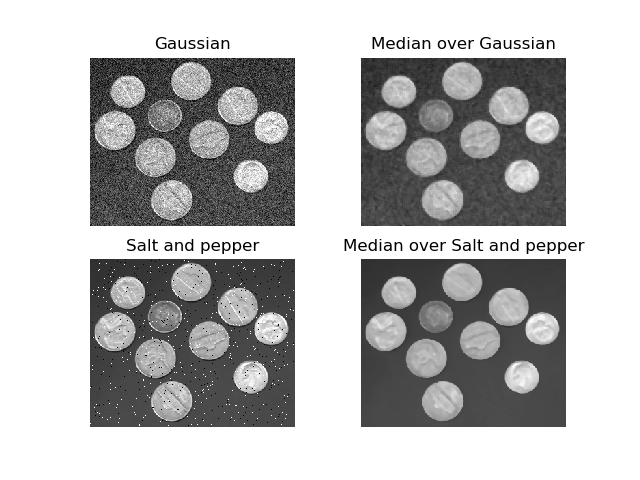

In [15]:
gaussianmedian = cv2.medianBlur(coinsgaussian, 5)
sandpmedian = cv2.medianBlur(coinssp, 5)

plt.figure()
plt.subplot(221),plt.imshow(coinsgaussian, cmap = 'gray', vmin = 0, vmax = 255),plt.title('Gaussian')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.subplot(222),plt.imshow(gaussianmedian, cmap = 'gray', vmin = 0, vmax = 255),plt.title('Median over Gaussian')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.subplot(223),plt.imshow(coinssp, cmap = 'gray', vmin = 0, vmax = 255),plt.title('Salt and pepper')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.subplot(224),plt.imshow(sandpmedian, cmap = 'gray', vmin = 0, vmax = 255),plt.title('Median over Salt and pepper')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)

plt.show()

**Filterfor edge detection**

Finite difference filters or high-pass filter are filters commonly used to for edge dettention. Similarly to the averagiong filters they use a kernel with predetermined values, in this case the values must add up to 0. There are patterns for this Kernels that are used for different things, this kernels also make a difference between vertical and horizontal borders.

- Prewitt: Only uses ones and zeroes in it's kernel. For horizontal borders the Kernel has one row with minus ones, another row of zeros and a last row of ones. For vertical is the transposed matrix fo the horizontal kernel. The two resulting images ar complimentary.

Filter the original coins image using a prewitt kernel (the function is cv2.filter2d), first get the horizontal borders, then the vertical, add the results to get the full fitered image. Represent the original coins, and the three steps of the prewitt filter. 
To finish getting get the binary of the filtered image and represent it.

<IPython.core.display.Javascript object>


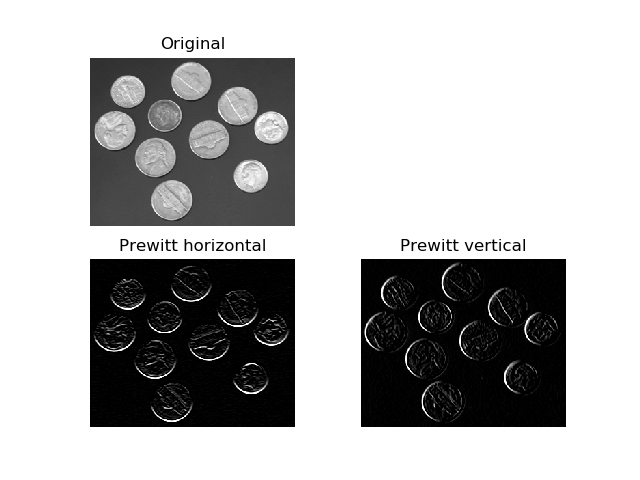

In [16]:
prewitth = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
prewittv = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

coinsph = cv2.filter2D(coins, -1, prewitth, borderType= cv2.BORDER_REFLECT)
coinspv = cv2.filter2D(coins, -1, prewittv, borderType= cv2.BORDER_REFLECT)

plt.figure()
plt.subplot(221),plt.imshow(coins, cmap = 'gray', vmin = 0, vmax = 255),plt.title('Original')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.subplot(223),plt.imshow(coinsph, cmap = 'gray', vmin = 0, vmax = 255),plt.title('Prewitt horizontal')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.subplot(224),plt.imshow(coinspv, cmap = 'gray', vmin = 0, vmax = 255),plt.title('Prewitt vertical')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

<IPython.core.display.Javascript object>


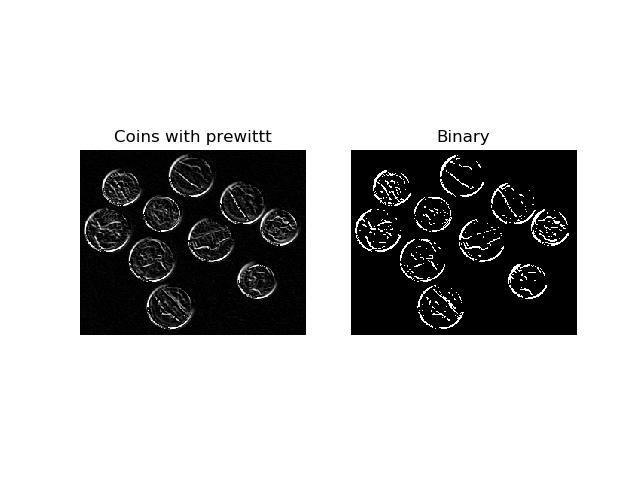

In [17]:
coinsprewitt = coinsph + coinspv

[thresh, coinbin] = cv2.threshold(coinsprewitt, 127, 255, cv2.THRESH_OTSU)

plt.figure()
plt.subplot(121),plt.imshow(coinsprewitt, cmap = 'gray', vmin = 0, vmax = 255),plt.title('Coins with prewittt')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.subplot(122),plt.imshow(coinbin, cmap = 'gray', vmin = 0, vmax = 255),plt.title('Binary')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

Trying different threshold

<IPython.core.display.Javascript object>


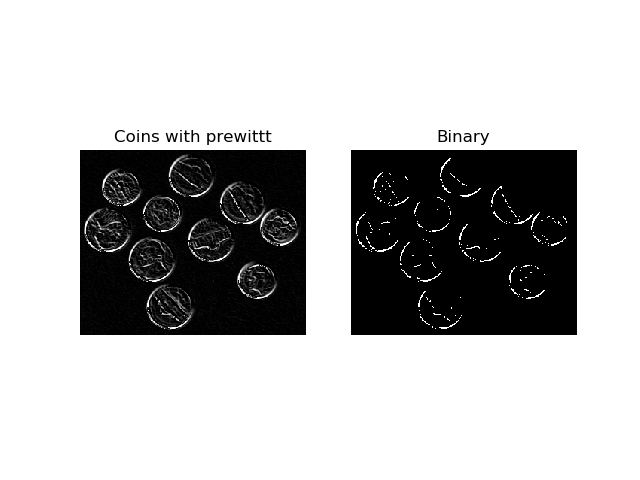

In [18]:
[thresh, coinbin] = cv2.threshold(coinsprewitt, 160, 255, cv2.THRESH_BINARY)

plt.figure()
plt.subplot(121),plt.imshow(coinsprewitt, cmap = 'gray', vmin = 0, vmax = 255),plt.title('Coins with prewittt')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.subplot(122),plt.imshow(coinbin, cmap = 'gray', vmin = 0, vmax = 255),plt.title('Binary')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

**Isotropic filter**

This filter does the same as the Prewitt filter being another high-pass filter but it does not requiere the double step of getting the vertical and horizontal edges. The kernel is anoter 3x3 matrix with minus one in all values but the center that is eight, this way it adds up to 0.

Filter the image coins with an isotropic filter, get the binary image and represent all three.

<IPython.core.display.Javascript object>


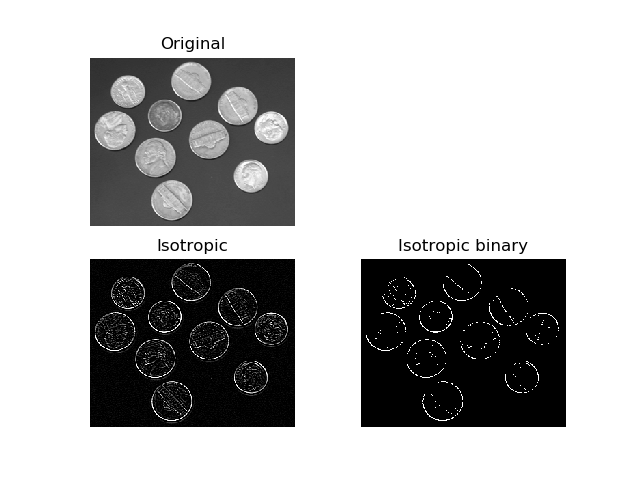

In [19]:
isotropic = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

coinsiso = cv2.filter2D(coins, -1, isotropic, borderType= cv2.BORDER_REFLECT)
[thresh, coinsbiniso] = cv2.threshold(coinsiso, 160, 255, cv2.THRESH_BINARY)


plt.figure()
plt.subplot(221),plt.imshow(coins, cmap = 'gray', vmin = 0, vmax = 255),plt.title('Original')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.subplot(223),plt.imshow(coinsiso, cmap = 'gray', vmin = 0, vmax = 255),plt.title('Isotropic')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.subplot(224),plt.imshow(coinsbiniso, cmap = 'gray', vmin = 0, vmax = 255),plt.title('Isotropic binary')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

**Improving results**

To improve results we are going to add a step of pre-processing to the image by softening it before getting the edges. Do this preprocessin step with the two softening filter used previously, then use an isotropic filter on boft softened images and get the binaries (is recomended to look at the histogram in order to select a threhshold) of the result. Represent the result gotten without pre-processing and this two new results, which one is better? 

<IPython.core.display.Javascript object>


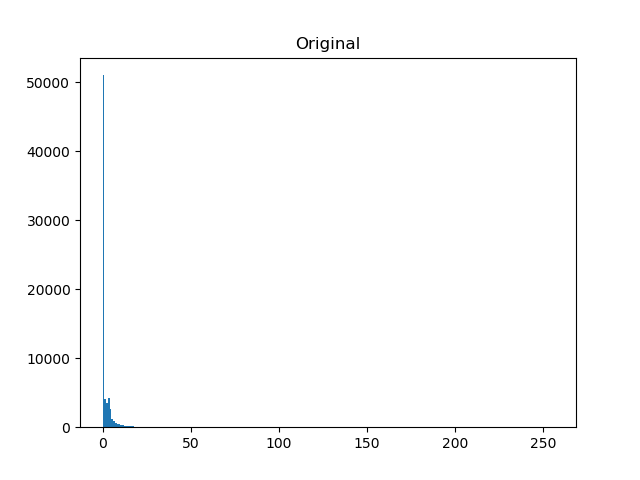

<IPython.core.display.Javascript object>


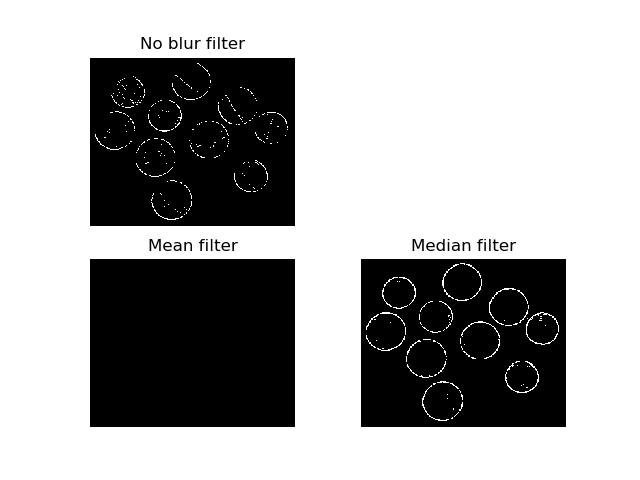

In [22]:
kernel11 = np.ones((11,11),np.float32)/(11*11)

coinsmean = cv2.filter2D(coins, -1, kernel11, borderType= cv2.BORDER_REFLECT)
coinsmedian = cv2.medianBlur(coins, 11)

coinsisomean = cv2.filter2D(coinsmean, -1, isotropic, borderType= cv2.BORDER_REFLECT)
[thresh, coinsisomean] = cv2.threshold(coinsisomean, 120, 255, cv2.THRESH_BINARY)

coinsisomed = cv2.filter2D(coinsmedian, -1, isotropic, borderType= cv2.BORDER_REFLECT)

plt.figure('histograms median')
plt.hist(coinsisomed.ravel(),256,[0,256]),plt.title('Original') 
plt.show()

[thresh, coinsisomed] = cv2.threshold(coinsisomed, 25, 255, cv2.THRESH_BINARY)


plt.figure()
plt.subplot(221),plt.imshow(coinsbiniso, cmap = 'gray', vmin = 0, vmax = 255),plt.title('No blur filter')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.subplot(223),plt.imshow(coinsisomean, cmap = 'gray', vmin = 0, vmax = 255),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.subplot(224),plt.imshow(coinsisomed, cmap = 'gray', vmin = 0, vmax = 255),plt.title('Median filter')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

**Composing images**

In this last exercise we want the contour of the coins to appear in red over the original image. For this remember that color images hace three matrices (from the fisrt exercise look the color spaces and last point), you will need [arithmetic operations](https://docs.opencv.org/3.2.0/d0/d86/tutorial_py_image_arithmetics.html) ant to operate bit by bit on this matrices.
Represent this final image.

<IPython.core.display.Javascript object>


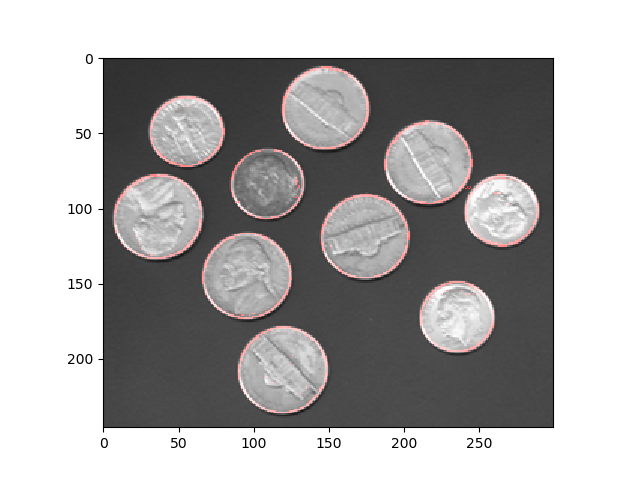

In [21]:
coinsRGB = cv2.cvtColor(coins, cv2.COLOR_GRAY2RGB)
Bnew = np.zeros((coins.shape), np.uint8)
Gnew = np.zeros((coins.shape), np.uint8)
coinstag = cv2.merge((coinsisomed,Gnew,Bnew))

coinsseg = cv2.add(coinsRGB, coinstag)
#bitwise_or
plt.figure()
plt.imshow(coinsseg)
plt.show()